# Import Stuff

In [1]:
import numpy as np
import pandas as pd
import json
import sagemaker
import boto3
#from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.session import s3_input, Session
import os

# Import Data

In [36]:
#Loading Data from data.gov.sg
import requests

print(fileobj2.text)
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&q=2021'
records = []
while True:
    response = requests.get(url).json()
    if not response["success"]:
        print("Error loading data")
        break
    data = response["result"]["records"]
    if len(data) == 0:
        print("Import complete")
        break
    records += data
    print(len(records))
    url = 'https://data.gov.sg' + response["result"]["_links"]["next"]
    
    

{"help": "https://data.gov.sg/api/3/action/help_show?name=datastore_search", "success": true, "result": {"resource_id": "f1765b54-a209-4718-8d38-a39237f502b3", "fields": [{"type": "int4", "id": "_id"}, {"type": "text", "id": "month"}, {"type": "text", "id": "town"}, {"type": "text", "id": "flat_type"}, {"type": "text", "id": "block"}, {"type": "text", "id": "street_name"}, {"type": "text", "id": "storey_range"}, {"type": "numeric", "id": "floor_area_sqm"}, {"type": "text", "id": "flat_model"}, {"type": "numeric", "id": "lease_commence_date"}, {"type": "text", "id": "remaining_lease"}, {"type": "numeric", "id": "resale_price"}, {"type": "int8", "id": "_full_count"}, {"type": "float4", "id": "rank"}], "q": "2021", "records": [], "_links": {"start": "/api/action/datastore_search?q=2021&resource_id=f1765b54-a209-4718-8d38-a39237f502b3", "prev": "/api/action/datastore_search?q=2021&resource_id=f1765b54-a209-4718-8d38-a39237f502b3&offset=49200", "next": "/api/action/datastore_search?q=2021&r

In [41]:
#Save Data to File
import json

with open('data.json', 'w') as fp:
    json.dump(records, fp)

In [2]:
import json
#Load Data from Json

with open('data.json', 'r') as fp:
    data = json.load(fp)
print(len(data))

49242


# View Data
Here, let's view some columsn of the data that we want to have a look at.
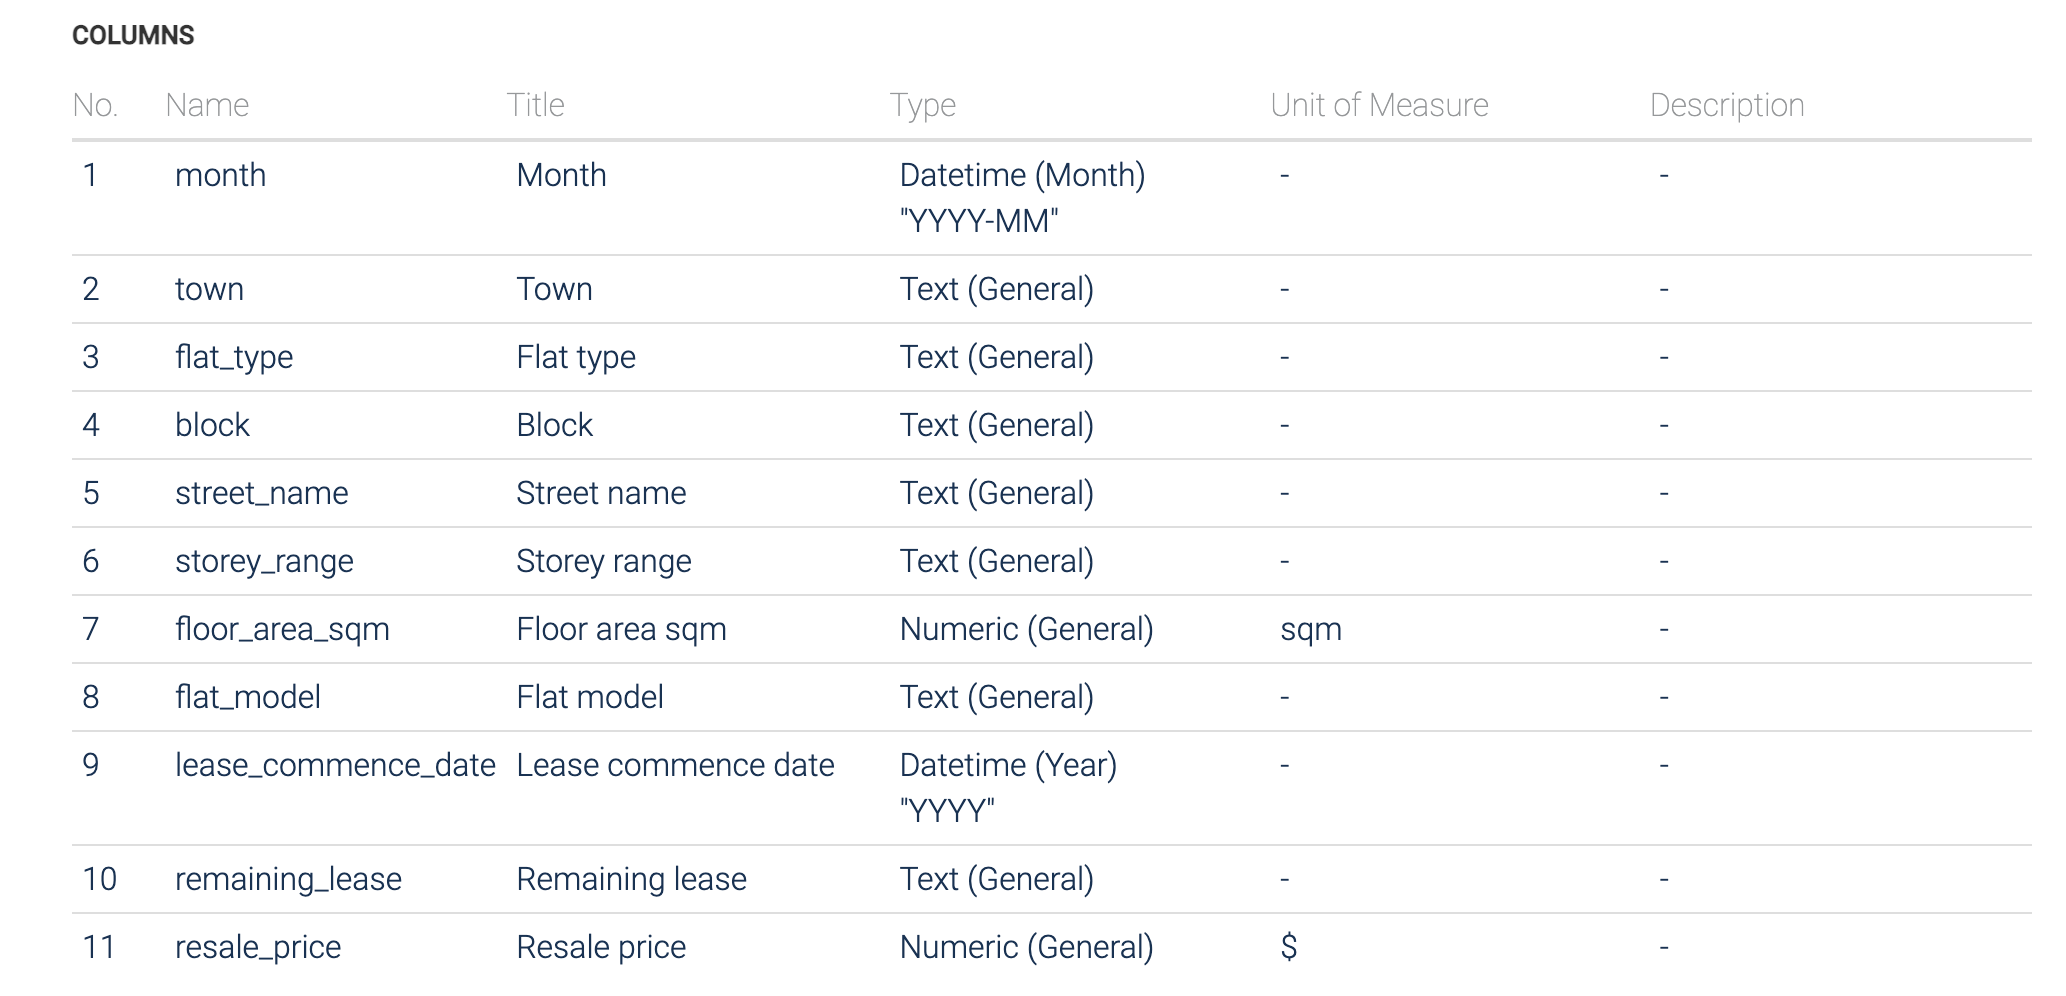

In [4]:
print(data[1])
df = pd.DataFrame(data)
print(df)

{'town': 'ANG MO KIO', 'flat_type': '3 ROOM', '_full_count': '49242', 'flat_model': 'New Generation', 'floor_area_sqm': '73', 'street_name': 'ANG MO KIO AVE 1', 'resale_price': '275888', 'rank': 0.0573088, 'month': '2021-01', 'remaining_lease': '54 years 04 months', 'lease_commence_date': '1976', 'storey_range': '04 TO 06', '_id': 172579, 'block': '216'}
             town flat_type _full_count         flat_model floor_area_sqm  \
0      ANG MO KIO    2 ROOM       49242           Improved             45   
1      ANG MO KIO    3 ROOM       49242     New Generation             73   
2      ANG MO KIO    3 ROOM       49242     New Generation             67   
3      ANG MO KIO    3 ROOM       49242     New Generation             67   
4      ANG MO KIO    3 ROOM       49242     New Generation             68   
...           ...       ...         ...                ...            ...   
49237   WOODLANDS    4 ROOM       49242            Model A            102   
49238   WOODLANDS    4 ROOM

In [46]:
for col in df:
    print(col)

town
flat_type
_full_count
flat_model
floor_area_sqm
street_name
resale_price
rank
month
remaining_lease
lease_commence_date
storey_range
_id
block


In [7]:
for col in ["town", "flat_type", "flat_model", "storey_range", "lease_commence_date"]:
    print(df[col].unique())
    
#floor_area_sqm
#street_name
#resale_price
#lease_commence_date

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'GEYLANG' 'CLEMENTI'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
['Improved' 'New Generation' 'Model A' 'DBSS' 'Standard' 'Adjoined flat'
 'Apartment' 'Simplified' 'Premium Apartment' 'Maisonette' 'Model A2'
 'Type S2' 'Type S1' 'Model A-Maisonette' 'Terrace'
 'Premium Apartment Loft' '2-room' 'Multi Generation' 'Premium Maisonette'
 'Improved-Maisonette']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '22 TO 24'
 '16 TO 18' '19 TO 21' '28 TO 30' '25 TO 27' '43 TO 45' '31 TO 33'
 '46 TO 48' '37 TO 39' '34 TO 36' '40 TO 42' '49 TO 51']
['1986' '1976' '1978' '1981' '1977' '1980' '2015' '1979' '1996' '2003'
 '2006' '2001' '2002' '2011' '199

In [41]:
remove_colums = ["_full_count", "street_name", "rank", "month", "remaining_lease", "_id", "block", "flat_model"]
df2 = df.drop(remove_colums, axis=1)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49242 entries, 0 to 49241
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   town                 49242 non-null  object
 1   flat_type            49242 non-null  object
 2   floor_area_sqm       49242 non-null  object
 3   resale_price         49242 non-null  object
 4   lease_commence_date  49242 non-null  object
 5   storey_range         49242 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


In [43]:
# Convert several text values to integers
for column in ['resale_price', 'floor_area_sqm', 'lease_commence_date']:
    df2[column] = pd.to_numeric(df2[column])

In [44]:
#Perform one hot encoding of town 
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ['town']
for feature in features_to_encode:
    df2 = encode_and_bind(df2, feature)

In [45]:
#Perform mapping of flat_type, storey_range
flat_type_map = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI-GENERATION': 7
}
storey_range_map = {
    '01 TO 03': 1,
    '04 TO 06': 2,
    '07 TO 09': 3,
    '10 TO 12': 4,
    '13 TO 15': 5,
    '22 TO 24': 6,
    '16 TO 18': 7,
    '19 TO 21': 8,
    '28 TO 30': 9,
    '25 TO 27': 10,
    '43 TO 45': 11,
    '31 TO 33': 12,
    '46 TO 48': 13,
    '37 TO 39': 14,
    '34 TO 36': 15,
    '40 TO 42': 16,
    '49 TO 51': 17
}
df2['storey_range'] = df2['storey_range'].map(storey_range_map)
df2['flat_type'] = df2['flat_type'].map(flat_type_map)

In [46]:
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49242 entries, 0 to 49241
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flat_type             49242 non-null  int64  
 1   floor_area_sqm        49242 non-null  float64
 2   resale_price          49242 non-null  float64
 3   lease_commence_date   49242 non-null  int64  
 4   storey_range          49242 non-null  int64  
 5   town_ANG MO KIO       49242 non-null  uint8  
 6   town_BEDOK            49242 non-null  uint8  
 7   town_BISHAN           49242 non-null  uint8  
 8   town_BUKIT BATOK      49242 non-null  uint8  
 9   town_BUKIT MERAH      49242 non-null  uint8  
 10  town_BUKIT PANJANG    49242 non-null  uint8  
 11  town_BUKIT TIMAH      49242 non-null  uint8  
 12  town_CENTRAL AREA     49242 non-null  uint8  
 13  town_CHOA CHU KANG    49242 non-null  uint8  
 14  town_CLEMENTI         49242 non-null  uint8  
 15  town_GEYLANG       

,flat_type,floor_area_sqm,resale_price,lease_commence_date,storey_range,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,2,45.0,211000.0,1986,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,73.0,275888.0,1976,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,67.0,316800.0,1978,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,67.0,305000.0,1978,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,68.0,260000.0,1981,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49237,4,102.0,440000.0,1996,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49238,4,104.0,420000.0,2000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49239,4,101.0,455000.0,2000,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49240,4,90.0,400000.0,2001,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
train_data, test_data = np.split(df2.sample(frac=1, random_state=1729), [int(0.7 * len(df))])
print(train_data.shape, test_data.shape)

(34469, 31) (14773, 31)


In [48]:
print(train_data)

       flat_type  floor_area_sqm  resale_price  lease_commence_date  \
22140          3            67.0      330000.0                 1983   
10751          3            67.0      268888.0                 1970   
32115          5           123.0      555388.0                 1993   
33318          5           123.0      550000.0                 1992   
42645          3            59.0      343000.0                 1974   
...          ...             ...           ...                  ...   
18613          5           113.0      640000.0                 2017   
34516          6           163.0      800000.0                 1993   
5114           2            46.0      218000.0                 1967   
49063          3            67.0      320000.0                 1978   
5426           4            92.0      435000.0                 2012   

       storey_range  town_ANG MO KIO  town_BEDOK  town_BISHAN  \
22140             3                0           0            0   
10751            

# Train Model

In [13]:
# import libraries
import boto3, re, sys, math, json, os, sagemaker, urllib.request
from sagemaker import get_execution_role
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from IPython.display import Image
#from IPython.display import display
#from time import gmtime, strftime
from sagemaker.predictor import csv_serializer

# Define IAM role
role = get_execution_role()
prefix = 'sagemaker/DEMO-xgboost-dm'
my_region = boto3.session.Session().region_name # set the region of the instance

# this line automatically looks for the XGBoost image URI and builds an XGBoost container.
xgboost_container = sagemaker.image_uris.retrieve("xgboost", my_region, "latest")

print("Success - the MySageMakerInstance is in the " + my_region + " region. You will use the " + xgboost_container + " container for your SageMaker endpoint.")

Matplotlib is building the font cache; this may take a moment.


Success - the MySageMakerInstance is in the ap-southeast-1 region. You will use the 475088953585.dkr.ecr.ap-southeast-1.amazonaws.com/xgboost:latest container for your SageMaker endpoint.


In [59]:
bucket_name = 'hdb-sagemaker' # <--- CHANGE THIS VARIABLE TO A UNIQUE NAME FOR YOUR BUCKET
s3 = boto3.resource('s3')
try:
    if  my_region == 'us-east-1':
      s3.create_bucket(Bucket=bucket_name)
    else: 
      s3.create_bucket(Bucket=bucket_name, CreateBucketConfiguration={ 'LocationConstraint': my_region })
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ',e)

S3 bucket created successfully


In [49]:
#UPload and configure training input
bucket_name = 'hdb-sagemaker'
pd.concat([train_data['resale_price'], train_data.drop(["resale_price"], axis=1)], axis=1).to_csv('train.csv', index=False, header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
s3_input_train = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [50]:
#Create the estimator
sess = sagemaker.Session()
xgb = sagemaker.estimator.Estimator(xgboost_container,role, instance_count=1, instance_type='ml.m4.xlarge',output_path='s3://{}/{}/output'.format(bucket_name, prefix),sagemaker_session=sess)
xgb.set_hyperparameters(max_depth=5,eta=0.2,gamma=4,min_child_weight=6,subsample=0.8,silent=0,num_round=100)

In [51]:
#Perform training.
xgb.fit({'train': s3_input_train})

2021-11-24 03:50:57 Starting - Starting the training job...
2021-11-24 03:51:13 Starting - Launching requested ML instancesProfilerReport-1637725857: InProgress
.........
2021-11-24 03:52:55 Starting - Preparing the instances for training......
2021-11-24 03:53:55 Downloading - Downloading input data...
2021-11-24 03:54:25 Training - Training image download completed. Training in progress..Arguments: train
[2021-11-24:03:54:26:INFO] Running standalone xgboost training.
[2021-11-24:03:54:26:INFO] Path /opt/ml/input/data/validation does not exist!
[2021-11-24:03:54:26:INFO] File size need to be processed in the node: 4.96mb. Available memory size in the node: 8349.9mb
[2021-11-24:03:54:26:INFO] Determined delimiter of CSV input is ','
[03:54:26] S3DistributionType set as FullyReplicated
[03:54:26] 68938x30 matrix with 2068140 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[03:54:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra node

# Test Model

In [52]:
#Deploy Sagemaker endpoint
xgb_predictor = xgb.deploy(initial_instance_count=1,instance_type='ml.t2.medium')

-------!

In [154]:
from sagemaker.serializers import CSVSerializer

test_data_array = test_data.drop(['resale_price'], axis=1).values #load the data into an array
xgb_predictor.serializer = CSVSerializer() # set the serializer type
predictions = xgb_predictor.predict(test_data_array).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array

In [155]:
#View a sample of the results.
recorded_data = test_data['resale_price'].to_numpy()
print("Predicted\tTest data value")
for i in range(10):
    print(str(int(predictions_array[i])) + '\t\t' + str(recorded_data[i]))


Predicted	Test data value
53775		715888.0
356521		336088.0
753078		760000.0
427504		375000.0
655532		590000.0
760664		778000.0
515926		530000.0
566009		523800.0
480990		460000.0
282436		298000.0


In [156]:
#Calculate MSQE
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(predictions_array, recorded_data))
print(rms)

40294.710334982985


# Using an existing endpoint for training
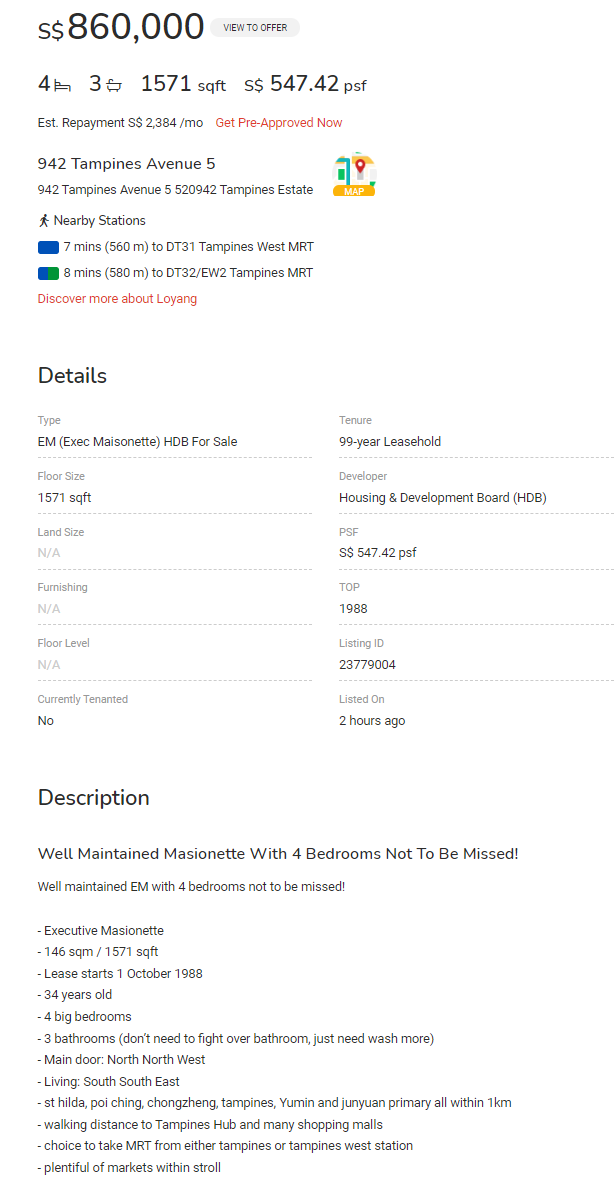

In [120]:
#Import Predictor
from sagemaker.serializers import CSVSerializer

sess = sagemaker.Session()
endpoint_name='xgboost-2021-11-24-03-55-25-924'
predictor_model = sagemaker.predictor.Predictor(endpoint_name, sagemaker_session=sess)
predictor_model.serializer = CSVSerializer() 

In [182]:
#Collected data from image provided:
flat_type = "EXECUTIVE"
floor_area_sqm = 146
lease_commence_date = 1988
storey_range = "07 TO 09" #Missing data, added estimate
town = "TAMPINES"
#Listing price: 320000

In [183]:
# Perform data transformation from inputs
# Map categorial variables to values
flat_type_map = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI-GENERATION': 7
}
storey_range_map = {
    '01 TO 03': 1,
    '04 TO 06': 2,
    '07 TO 09': 3,
    '10 TO 12': 4,
    '13 TO 15': 5,
    '22 TO 24': 6,
    '16 TO 18': 7,
    '19 TO 21': 8,
    '28 TO 30': 9,
    '25 TO 27': 10,
    '43 TO 45': 11,
    '31 TO 33': 12,
    '46 TO 48': 13,
    '37 TO 39': 14,
    '34 TO 36': 15,
    '40 TO 42': 16,
    '49 TO 51': 17
}

flat_type = flat_type_map[flat_type]
storey_range = storey_range_map[storey_range]
print(flat_type, storey_range)

6 3


In [184]:
test_array =  np.zeros((1, 30))
test_array[0][0] = flat_type
test_array[0][1] = floor_area_sqm
test_array[0][2] = lease_commence_date
test_array[0][3] = storey_range

town_map = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT PANJANG': 6,
     'BUKIT TIMAH': 7,
    'CENTRAL AREA': 8,
    'CHOA CHU KANG': 9,
    'GEYLANG': 10,
    'CLEMENTI': 11,
     'HOUGANG': 12,
    'JURONG EAST': 13,
    'JURONG WEST': 14,
    'KALLANG/WHAMPOA': 15,
    'MARINE PARADE': 16,
     'PASIR RIS': 17,
    'PUNGGOL': 18,
    'QUEENSTOWN': 19,
    'SEMBAWANG': 20,
    'SENGKANG': 21,
    'SERANGOON': 22,
     'TAMPINES': 23,
    'TOA PAYOH': 24,
    'WOODLANDS': 25,
    'YISHUN': 26
}
position = town_map[town]
print(position)
test_array[0][position+3] = 1 
print(test_array)

23
[[6.000e+00 1.460e+02 1.988e+03 3.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00]]


In [185]:
# Perform prediction
prod_prediction = predictor_model.predict(test_array).decode('utf-8') # predict!

In [186]:
prod_prediction

'736958.6875'

# Cleanup

In [ ]:
#Delete endpoint
sess.delete_endpoint(
    endpoint_name=xgb_predictor.endpoint_name
)